### Initialization of Libraries

In [88]:
# Load required libraries for regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV
#For feature selection
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


### Import of Dataset

In [66]:
#Import Data
kc_df=pd.read_csv('kc_house_data.csv')
kc_df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Preprocessing and Data Cleaning
1. Check on the missing values
2. Round the 'bathrooms' column to the nearest integer

In [68]:
# Check for missing values
print("Missing values:\n", kc_df.isnull().sum())



Missing values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [70]:
#check the dtype
print(kc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [72]:
# Round the 'bathrooms' column to the nearest integer
kc_df['bathrooms'] = kc_df['bathrooms'].round().astype(int)

# Displaying the updated dataframe with rounded bathrooms
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
#check the dtype
print(kc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int32  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Exploratory Data Analysis

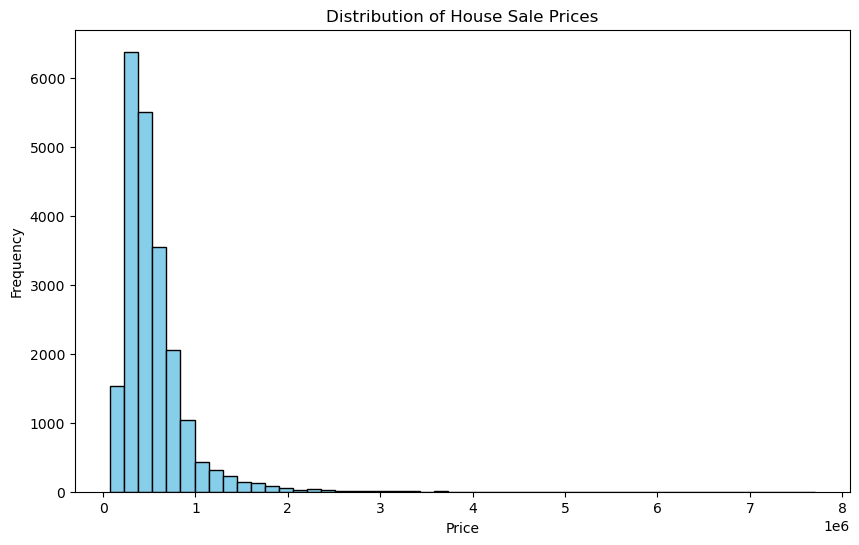

In [74]:
# Visualize the target variable (SalePrice)
plt.figure(figsize=(10,6))
plt.hist(kc_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Sale Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Data Cleaning
1. Skewed results
2. Apply log transformation to normalise the distribution

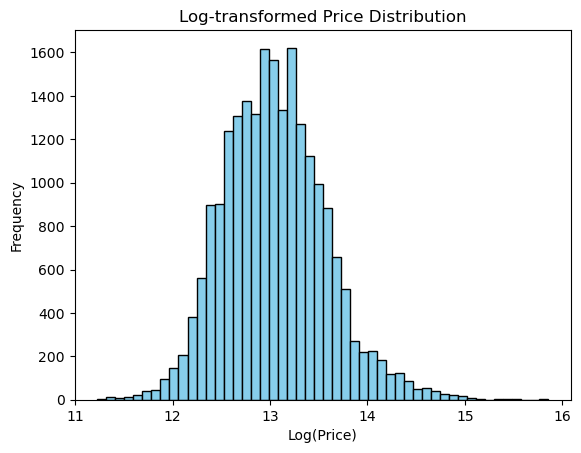

In [78]:
# Apply log transformation to the price column
kc_df_log=kc_df.copy()

kc_df_log['price'] = np.log1p(kc_df_log['price'])

# Check the transformed price distribution
import matplotlib.pyplot as plt
plt.hist(kc_df_log['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


In [82]:
# Define features and target
X = kc_df_log.drop(columns=['id', 'date','price'])
y = kc_df_log['price']
X


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,1,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Recursive Feature Elimination with Cross Validation
1. Helps to select optimal subset of features

In [90]:
# Initialize Random Forest model
model_rf = RandomForestRegressor()
# Initialize RFE with RFECV
rfecv = RFECV(estimator=model_rf, step=1, cv=KFold(5), scoring='r2')
# Fit RFECV
rfecv.fit(X, y)
# Print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)
# Print the selected features indices
print("Selected features indices: ", rfecv.support_)
# To print features name
if hasattr(X, 'columns'):
    selected_features = X.columns[rfecv.support_]
    print("Selected features: ", selected_features)

Optimal number of features : 17
Selected features indices:  [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True]
Selected features:  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


In [138]:
#duplicate a copy
kc_df_cleaned=kc_df_log.copy()

kc_df_cleaned['zipcode'] = kc_df_cleaned['zipcode'].astype('category').cat.codes



### Feature Selection based on RFECV

In [140]:
#Features Selection, removed yr_renovated

# Define features and target
X_cleaned = kc_df_cleaned.drop(columns=[ 'id','date', 'yr_renovated','price'])
y_cleaned = kc_df_cleaned['price']
X_cleaned


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,66,47.5112,-122.257,1340,5650
1,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,55,47.7210,-122.319,1690,7639
2,2,1,770,10000,1.0,0,0,3,6,770,0,1933,16,47.7379,-122.233,2720,8062
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,58,47.5208,-122.393,1360,5000
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,37,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2,1530,1131,3.0,0,0,3,8,1530,0,2009,42,47.6993,-122.346,1530,1509
21609,4,2,2310,5813,2.0,0,0,3,8,2310,0,2014,60,47.5107,-122.362,1830,7200
21610,2,1,1020,1350,2.0,0,0,3,7,1020,0,2009,59,47.5944,-122.299,1020,2007
21611,3,2,1600,2388,2.0,0,0,3,8,1600,0,2004,15,47.5345,-122.069,1410,1287


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2)
print(X_cleaned.shape)
print(X_train.shape)
print(X_test.shape)

(21613, 17)
(17290, 17)
(4323, 17)


## Model Training with Default Parameter

Regression Models used

1. Support Vector Regression
2. Linear Regression
3. Decision Tree Regressor 
4. Random Forest Regressor

In [102]:
# Scaling for SVR & Linear Regression (important for performance)
scaler = StandardScaler()

# Apply scaling to the features 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Fit the SVR model
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)  # Use scaled data for SVR
y_pred_svr = model_svr.predict(X_test_scaled)

In [106]:
#fit a LinearRegression
model_lr= LinearRegression()
model_lr.fit(X_train_scaled,y_train)
y_pred_lr=model_lr.predict(X_test_scaled)

In [108]:
#fit a Decision Tree Regressor
model_dt= DecisionTreeRegressor()
#train model using training data only
model_dt.fit(X_train,y_train)
print(model_dt)

#make prediction
y_pred_dt=model_dt.predict(X_test)


DecisionTreeRegressor()


In [142]:
#fit a Random Forest Regressor
model_rf= RandomForestRegressor()
#train model using training data only
model_rf.fit(X_train,y_train)
print(model_rf)

#make prediction
y_pred_rf=model_rf.predict(X_test)

RandomForestRegressor()


In [145]:
#Linear Regression
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)

#Decision Tree
mse_dt=mean_squared_error(y_test,y_pred_dt)
rmse_dt = mse_dt**0.5
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt=mean_absolute_error(y_test,y_pred_dt)

#SVR
mse_svr=mean_squared_error(y_test,y_pred_svr)
rmse_svr = mse_svr**0.5
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr=mean_absolute_error(y_test,y_pred_svr)

#random forest
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)

In [147]:
# Print metrics for Linear Regression
print("Linear Regression Metrics:")
print(f"  MSE:  {mse_lr:.4f}")
print(f"  RMSE: {rmse_lr:.4f}")
print(f"  MAE:  {mae_lr:.4f}")
print(f"  R²:   {r2_lr:.4f}")
print()

# Print metrics for Decision Tree
print("Decision Tree Regression Metrics:")
print(f"  MSE:  {mse_dt:.4f}")
print(f"  RMSE: {rmse_dt:.4f}")
print(f"  MAE:  {mae_dt:.4f}")
print(f"  R²:   {r2_dt:.4f}")
print()

# Print metrics for SVR
print("Support Vector Regression Metrics:")
print(f"  MSE:  {mse_svr:.4f}")
print(f"  RMSE: {rmse_svr:.4f}")
print(f"  MAE:  {mae_svr:.4f}")
print(f"  R²:   {r2_svr:.4f}")
print()

# Print metrics for Random Forest
print("Random Forest Regression Metrics:")
print(f"  MSE:  {mse_rf:.4f}")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  MAE:  {mae_rf:.4f}")
print(f"  R²:   {r2_rf:.4f}")


Linear Regression Metrics:
  MSE:  0.0660
  RMSE: 0.2569
  MAE:  0.1987
  R²:   0.7716

Decision Tree Regression Metrics:
  MSE:  0.0649
  RMSE: 0.2547
  MAE:  0.1803
  R²:   0.7755

Support Vector Regression Metrics:
  MSE:  0.0381
  RMSE: 0.1952
  MAE:  0.1385
  R²:   0.8681

Random Forest Regression Metrics:
  MSE:  0.0323
  RMSE: 0.1798
  MAE:  0.1261
  R²:   0.8881


In [149]:
#Comapre the CV scores

#Calculate CV Scores
cv_scores_lr = cross_val_score(model_lr, X, y, cv=5)
cv_scores_dt = cross_val_score(model_dt, X, y, cv=5)
cv_scores_rf = cross_val_score(model_rf, X, y, cv=5)
cv_scores_svr = cross_val_score(model_svr, X, y, cv=5)


print(f"Linear Regression Cross-validation accuracy: {cv_scores_lr.mean():.4f}")
print(f"Linear Regression Cross-validation standard deviation: {cv_scores_lr.std():.4f}\n")
print(f"Decision Tree Forest Cross-validation accuracy: {cv_scores_dt.mean():.4f}")
print(f"Decision Tree Cross-validation standard deviation: {cv_scores_dt.std():.4f}\n")
print(f"SVR Cross-validation accuracy: {cv_scores_svr.mean():.4f}")
print(f"SVR Cross-validation standard deviation: {cv_scores_svr.std():.4f}\n")
print(f"Random Forest Cross-validation accuracy: {cv_scores_rf.mean():.4f}")
print(f"Random Forest Cross-validation standard deviation: {cv_scores_rf.std():.4f}")




Linear Regression Cross-validation accuracy: 0.7662
Linear Regression Cross-validation standard deviation: 0.0068

Decision Tree Forest Cross-validation accuracy: 0.7758
Decision Tree Cross-validation standard deviation: 0.0102

SVR Cross-validation accuracy: 0.5196
SVR Cross-validation standard deviation: 0.0069

Random Forest Cross-validation accuracy: 0.8878
Random Forest Cross-validation standard deviation: 0.0042


### Hyperparameter Tuning of Random Forest Model

In [118]:
#random forest chosen based on cross validation score and evaluation metrics
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [120]:
# Hyperparameter tuning for Random Forest
hyperparameter_space = {'n_estimators': [100,200,300,400], 'max_depth': [None, 10, 20,30]}
print(hyperparameter_space)

# define grid search , 10-fold cross validation
grid_rf = GridSearchCV(estimator=model_rf, param_grid=hyperparameter_space, cv=5, scoring='r2') 
grid_rf.fit(X_train, y_train) 

print('The best n_estimators:', grid_rf.best_estimator_.n_estimators) 
print('The best max_depth:', grid_rf.best_estimator_.max_depth) 

{'n_estimators': [100, 200, 300, 400], 'max_depth': [None, 10, 20, 30]}
The best n_estimators: 400
The best max_depth: 20


In [126]:
# Use the best model to make predictions
best_rf_model = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

#Evaluate
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mse_rf_tuned**0.5
#mape_rf_tuned = mean_absolute_percentage_error(y_test, y_pred_rf_tuned)
r2_tf_tuned= r2_score(y_test,y_pred_rf_tuned)
mae_rf_tuned=mean_absolute_error(y_test, y_pred_rf_tuned)
# Evaluation
print(f'For the best model, MSE is {mse_rf_tuned:.4f}')
print(f'For the best model, RSME is {rmse_rf_tuned:.4f}')
#print(f'For the best model, MAPE is {mape_rf_tuned:.4f}')
print(f'For the best model, MAE is {mae_rf_tuned:.4f}')
print(f'For the best model, r2 is {r2_tf_tuned:.4f}')



For the best model, MSE is 0.0317
For the best model, RSME is 0.1781
For the best model, MAE is 0.1248
For the best model, r2 is 0.8902
